# **ЗАДАНИЕ 2** - МЕДИАННЫЙ ФИЛЬТР

## 1. Импорты

In [1]:
import torch
import matplotlib.pyplot as plt

## 2. Реализация медианного фильтра

In [2]:
def median_filter_torch(image: torch.Tensor, kernel_size: int) -> torch.Tensor:
    """
    Args:
        image: Tensor (H, W) или (1, H, W) — grayscale изображение
        kernel_size: int — размер окна (3, 5, 10 и т.д.)
    Returns:
        Tensor (H, W) — отфильтрованное изображение
    """
    if image.dim() == 2:
        image = image.unsqueeze(0)  # -> (1, H, W)
    elif image.dim() == 3 and image.shape[0] != 1:
        raise ValueError("Функция поддерживает только 1-канальные изображения")

    pad = kernel_size // 2
    padded = torch.nn.functional.pad(image, (pad, pad, pad, pad), mode='reflect')

    patches = padded.unfold(1, kernel_size, 1).unfold(2, kernel_size, 1)
    # patches shape: (1, H, W, kernel_size, kernel_size)

    # transform into (1, H, W, kernel_size*kernel_size)
    patches = patches.contiguous().view(1, patches.shape[1], patches.shape[2], -1)

    median_vals = patches.median(dim=-1).values  # (1, H, W)

    return median_vals.squeeze(0)


## 3. Пример изображения с шумом

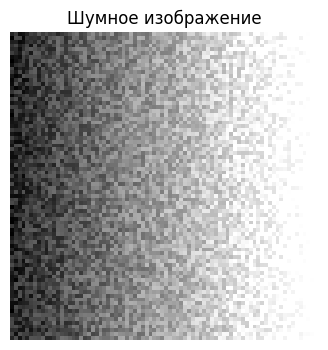

In [3]:
torch.manual_seed(0)
H, W = 80, 80
base = torch.linspace(0, 1, steps=W).repeat(H, 1)
noise = torch.rand(H, W) * 0.3
image_noisy = (base + noise).clamp(0, 1)

plt.figure(figsize=(4, 4))
plt.imshow(image_noisy, cmap='gray')
plt.title("Шумное изображение")
plt.axis('off')
plt.show()


## 4. Применение медианного фильтра с ядрами 3, 5 и 10

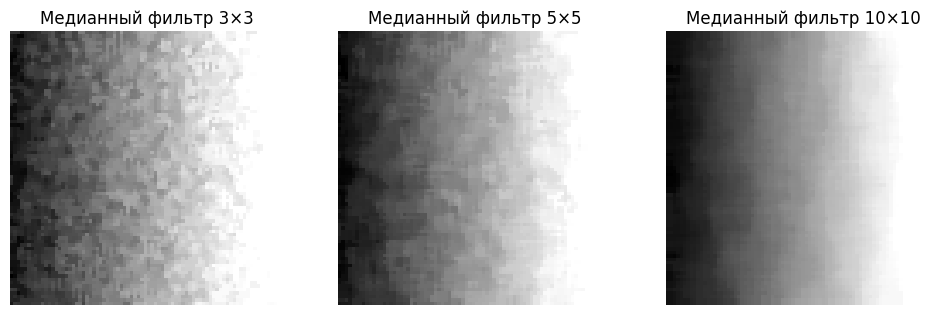

In [4]:
kernels = [3, 5, 10]
results = [median_filter_torch(image_noisy, k) for k in kernels]

plt.figure(figsize=(12, 4))
for i, k in enumerate(kernels):
    plt.subplot(1, 3, i+1)
    plt.imshow(results[i], cmap='gray')
    plt.title(f"Медианный фильтр {k}×{k}")
    plt.axis('off')
plt.show()

## 5. Проверка корректности

In [5]:
for k in kernels:
    filtered = median_filter_torch(image_noisy, k)
    print(f"Kernel {k}: размер = {tuple(filtered.shape)}, диапазон значений = ({filtered.min():.3f}, {filtered.max():.3f})")

Kernel 3: размер = (80, 80), диапазон значений = (0.057, 1.000)
Kernel 5: размер = (80, 80), диапазон значений = (0.099, 1.000)
Kernel 10: размер = (81, 81), диапазон значений = (0.129, 1.000)
